Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
from io import BytesIO
from PIL import Image
import ast
import base64

# Load dataset
file_path = "earthquake_data_clustering (1).csv"
df = pd.read_csv(file_path)

# Extract necessary features
coords = df[['Latitude', 'Longitude']]

# Normalize data
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(coords_scaled)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(coords_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(coords_scaled)

# Function to convert RGB lists to Base64 image
def convert_rgb_to_base64(rgb_list, size=(30, 30)):
    try:
        rgb_array = np.array(ast.literal_eval(rgb_list)) * 255
        image = Image.fromarray(rgb_array.astype('uint8'))
        image = image.resize(size)
        buffer = BytesIO()
        image.save(buffer, format="PNG")
        encoded = base64.b64encode(buffer.getvalue()).decode()
        return f"data:image/png;base64,{encoded}"
    except:
        return None

# Create a Folium Map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=3)
marker_cluster_kmeans = MarkerCluster(name="K-Means Clusters").add_to(m)
marker_cluster_gmm = MarkerCluster(name="GMM Clusters").add_to(m)
marker_cluster_dbscan = MarkerCluster(name="DBSCAN Clusters").add_to(m)

# Add points for K-Means
for i, row in df.iterrows():
    cluster = row['KMeans_Cluster']
    image_data = convert_rgb_to_base64(row['Image '])
    popup_html = f"<b>Cluster:</b> {cluster}" if not image_data else f'<b>Cluster:</b> {cluster}<br><img src="{image_data}" width="30" height="30">'
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=folium.Popup(popup_html, max_width=150)).add_to(marker_cluster_kmeans)

# Add points for GMM
for i, row in df.iterrows():
    cluster = row['GMM_Cluster']
    image_data = convert_rgb_to_base64(row['Image '])
    popup_html = f"<b>Cluster:</b> {cluster}" if not image_data else f'<b>Cluster:</b> {cluster}<br><img src="{image_data}" width="30" height="30">'
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=folium.Popup(popup_html, max_width=150)).add_to(marker_cluster_gmm)

# Add points for DBSCAN
for i, row in df.iterrows():
    cluster = row['DBSCAN_Cluster']
    if cluster == -1:  # Noise points in DBSCAN
        continue
    image_data = convert_rgb_to_base64(row['Image '])
    popup_html = f"<b>Cluster:</b> {cluster}" if not image_data else f'<b>Cluster:</b> {cluster}<br><img src="{image_data}" width="30" height="30">'
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=folium.Popup(popup_html, max_width=150)).add_to(marker_cluster_dbscan)

# Add Layer Control
folium.LayerControl().add_to(m)

# Save the map
m.save("earthquake_clusterss.html")

# Display cluster counts
print("Cluster counts for K-Means:")
print(df['KMeans_Cluster'].value_counts())
print("\nCluster counts for GMM:")
print(df['GMM_Cluster'].value_counts())
print("\nCluster counts for DBSCAN:")
print(df['DBSCAN_Cluster'].value_counts())

# Show map link
print("Map saved as earthquake_clusters.html. Download and view in a browser.")


Cluster counts for K-Means:
KMeans_Cluster
0    1729
3    1119
2     762
1     388
4     257
Name: count, dtype: int64

Cluster counts for GMM:
GMM_Cluster
4    1548
1    1226
3     575
2     554
0     352
Name: count, dtype: int64

Cluster counts for DBSCAN:
DBSCAN_Cluster
 0    2782
 1     819
 2     353
 4     125
-1      62
 3      32
 7      23
 8      18
 5      16
 6      14
 9      11
Name: count, dtype: int64
Map saved as earthquake_clusters.html. Download and view in a browser.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import folium
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
from io import BytesIO
from PIL import Image
import ast
import base64

# Load dataset
file_path = "earthquake_data_clustering (1).csv"
df = pd.read_csv(file_path)

# Extract necessary features
coords = df[['Latitude', 'Longitude']]

# Normalize data
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(coords_scaled)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(coords_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(coords_scaled)

# Function to evaluate clustering performance
def evaluate_clustering(coords, labels, method_name):
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 not in unique_labels:  # Ensure valid clustering
        silhouette = silhouette_score(coords, labels)
        calinski = calinski_harabasz_score(coords, labels)
        davies = davies_bouldin_score(coords, labels)
        print(f"\n{method_name} Clustering Metrics:")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Calinski-Harabasz Index: {calinski:.4f}")
        print(f"Davies-Bouldin Index: {davies:.4f}")
    else:
        print(f"\n{method_name} clustering failed to produce meaningful clusters.")

# Evaluate each clustering method
evaluate_clustering(coords_scaled, df['KMeans_Cluster'], "K-Means")
evaluate_clustering(coords_scaled, df['GMM_Cluster'], "GMM")
evaluate_clustering(coords_scaled, df['DBSCAN_Cluster'], "DBSCAN")

# Function to convert RGB lists to Base64 image
def convert_rgb_to_base64(rgb_list, size=(30, 30)):
    try:
        rgb_array = np.array(ast.literal_eval(rgb_list)) * 255
        image = Image.fromarray(rgb_array.astype('uint8'))
        image = image.resize(size)
        buffer = BytesIO()
        image.save(buffer, format="PNG")
        encoded = base64.b64encode(buffer.getvalue()).decode()
        return f"data:image/png;base64,{encoded}"
    except:
        return None

# Create a Folium Map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=3)
marker_cluster_kmeans = MarkerCluster(name="K-Means Clusters").add_to(m)
marker_cluster_gmm = MarkerCluster(name="GMM Clusters").add_to(m)
marker_cluster_dbscan = MarkerCluster(name="DBSCAN Clusters").add_to(m)

# Add points for K-Means
for i, row in df.iterrows():
    cluster = row['KMeans_Cluster']
    image_data = convert_rgb_to_base64(row['Image '])
    popup_html = f"<b>Cluster:</b> {cluster}" if not image_data else f'<b>Cluster:</b> {cluster}<br><img src="{image_data}" width="30" height="30">'
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=folium.Popup(popup_html, max_width=150)).add_to(marker_cluster_kmeans)

# Add points for GMM
for i, row in df.iterrows():
    cluster = row['GMM_Cluster']
    image_data = convert_rgb_to_base64(row['Image '])
    popup_html = f"<b>Cluster:</b> {cluster}" if not image_data else f'<b>Cluster:</b> {cluster}<br><img src="{image_data}" width="30" height="30">'
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=folium.Popup(popup_html, max_width=150)).add_to(marker_cluster_gmm)

# Add points for DBSCAN
for i, row in df.iterrows():
    cluster = row['DBSCAN_Cluster']
    if cluster == -1:  # Noise points in DBSCAN
        continue
    image_data = convert_rgb_to_base64(row['Image '])
    popup_html = f"<b>Cluster:</b> {cluster}" if not image_data else f'<b>Cluster:</b> {cluster}<br><img src="{image_data}" width="30" height="30">'
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=folium.Popup(popup_html, max_width=150)).add_to(marker_cluster_dbscan)

# Add Layer Control
folium.LayerControl().add_to(m)

# Save the map
m.save("earthquake_clustersi.html")

# Display cluster counts
print("\nCluster counts for K-Means:")
print(df['KMeans_Cluster'].value_counts())
print("\nCluster counts for GMM:")
print(df['GMM_Cluster'].value_counts())
print("\nCluster counts for DBSCAN:")
print(df['DBSCAN_Cluster'].value_counts())

# Show map link
print("Map saved as earthquake_clusters.html. Download and view in a browser.")



K-Means Clustering Metrics:
Silhouette Score: 0.5726
Calinski-Harabasz Index: 6199.7864
Davies-Bouldin Index: 0.5996

GMM Clustering Metrics:
Silhouette Score: 0.5278
Calinski-Harabasz Index: 5026.8519
Davies-Bouldin Index: 0.6951

DBSCAN clustering failed to produce meaningful clusters.

Cluster counts for K-Means:
KMeans_Cluster
0    1729
3    1119
2     762
1     388
4     257
Name: count, dtype: int64

Cluster counts for GMM:
GMM_Cluster
4    1548
1    1226
3     575
2     554
0     352
Name: count, dtype: int64

Cluster counts for DBSCAN:
DBSCAN_Cluster
 0    2782
 1     819
 2     353
 4     125
-1      62
 3      32
 7      23
 8      18
 5      16
 6      14
 9      11
Name: count, dtype: int64
Map saved as earthquake_clusters.html. Download and view in a browser.



K-Means Clustering Metrics:
Silhouette Score: 0.5726
Calinski-Harabasz Index: 6199.7864
Davies-Bouldin Index: 0.5996

GMM Clustering Metrics:
Silhouette Score: 0.5278
Calinski-Harabasz Index: 5026.8519
Davies-Bouldin Index: 0.6951

DBSCAN clustering failed to produce meaningful clusters.


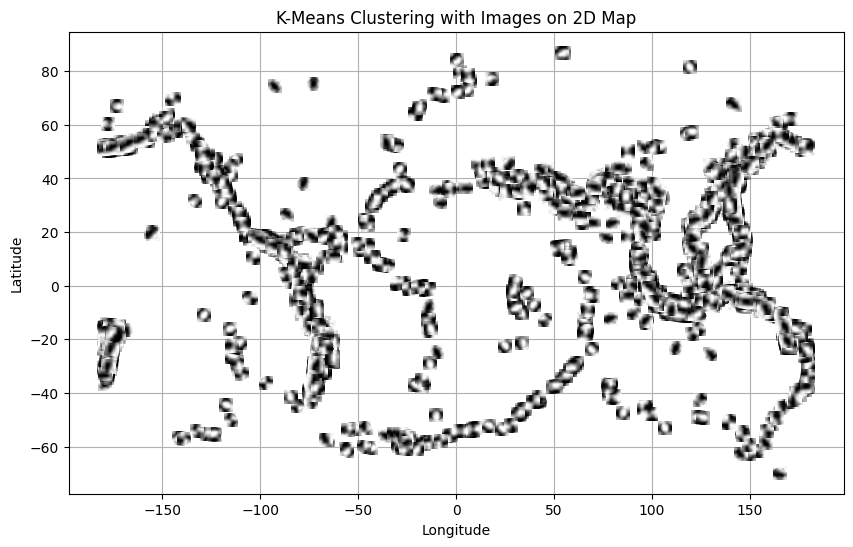

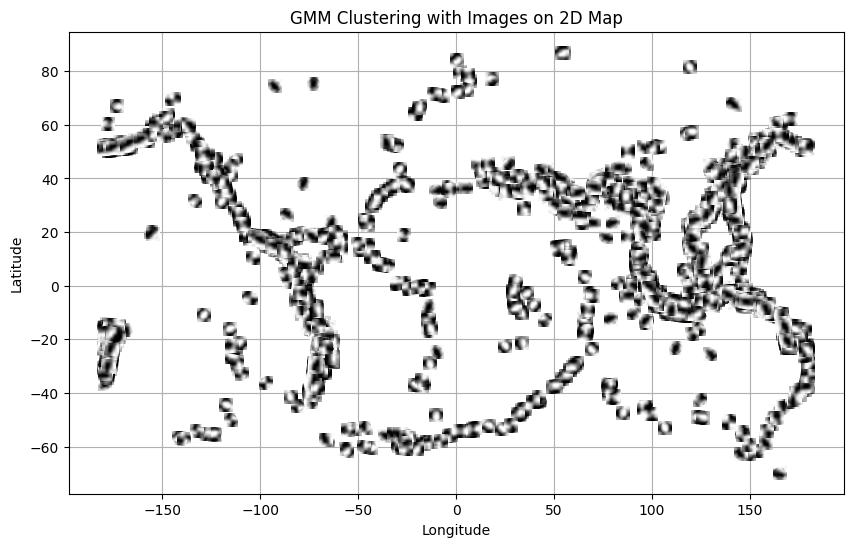

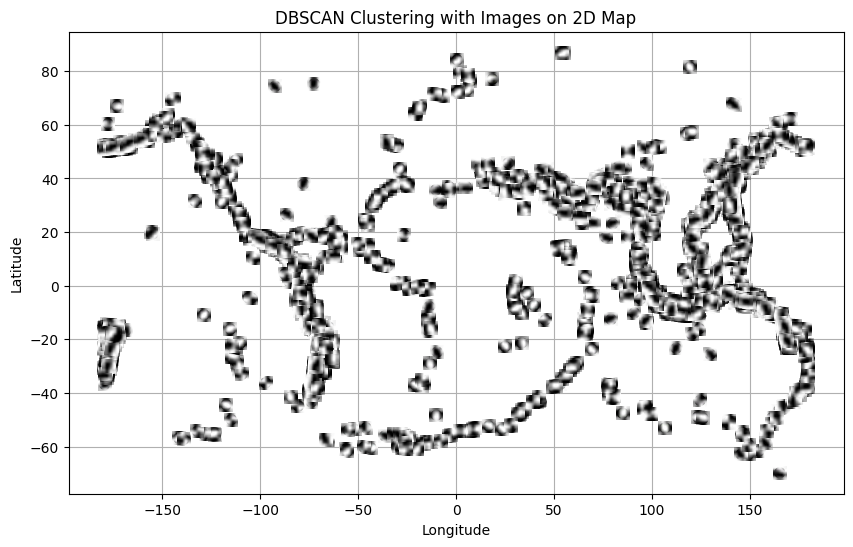


Cluster counts for K-Means:
KMeans_Cluster
0    1729
3    1119
2     762
1     388
4     257
Name: count, dtype: int64

Cluster counts for GMM:
GMM_Cluster
4    1548
1    1226
3     575
2     554
0     352
Name: count, dtype: int64

Cluster counts for DBSCAN:
DBSCAN_Cluster
 0    2782
 1     819
 2     353
 4     125
-1      62
 3      32
 7      23
 8      18
 5      16
 6      14
 9      11
Name: count, dtype: int64


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import folium
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
from io import BytesIO
from PIL import Image
import ast
import base64
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load dataset
file_path = "earthquake_data_clustering (1).csv"
df = pd.read_csv(file_path)

# Extract necessary features
coords = df[['Latitude', 'Longitude']]

# Normalize data
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(coords_scaled)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(coords_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.2, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(coords_scaled)

# Function to evaluate clustering performance
def evaluate_clustering(coords, labels, method_name):
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 not in unique_labels:  # Ensure valid clustering
        silhouette = silhouette_score(coords, labels)
        calinski = calinski_harabasz_score(coords, labels)
        davies = davies_bouldin_score(coords, labels)
        print(f"\n{method_name} Clustering Metrics:")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Calinski-Harabasz Index: {calinski:.4f}")
        print(f"Davies-Bouldin Index: {davies:.4f}")
    else:
        print(f"\n{method_name} clustering failed to produce meaningful clusters.")

# Evaluate each clustering method
evaluate_clustering(coords_scaled, df['KMeans_Cluster'], "K-Means")
evaluate_clustering(coords_scaled, df['GMM_Cluster'], "GMM")
evaluate_clustering(coords_scaled, df['DBSCAN_Cluster'], "DBSCAN")

# Function to convert RGB lists to images
def rgb_to_image(rgb_list):
    try:
        rgb_array = np.array(ast.literal_eval(rgb_list)) * 255
        image = Image.fromarray(rgb_array.astype('uint8'))
        return image
    except:
        return None

# Plot clustered points on a 2D map with images
def plot_clusters_with_images(df, cluster_col, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(df['Longitude'], df['Latitude'], c=df[cluster_col], cmap="viridis", s=50, edgecolor='k')
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)

    for i, row in df.iterrows():
        img = rgb_to_image(row['Image '])
        if img:
            img = img.resize((20, 20))  # Resize for visualization
            imagebox = OffsetImage(img, zoom=0.5)
            ab = AnnotationBbox(imagebox, (row['Longitude'], row['Latitude']), frameon=False)
            ax.add_artist(ab)

    plt.show()

# Plot for each clustering method with images
plot_clusters_with_images(df, 'KMeans_Cluster', "K-Means Clustering with Images on 2D Map")
plot_clusters_with_images(df, 'GMM_Cluster', "GMM Clustering with Images on 2D Map")
plot_clusters_with_images(df, 'DBSCAN_Cluster', "DBSCAN Clustering with Images on 2D Map")

# Show cluster counts
print("\nCluster counts for K-Means:")
print(df['KMeans_Cluster'].value_counts())
print("\nCluster counts for GMM:")
print(df['GMM_Cluster'].value_counts())
print("\nCluster counts for DBSCAN:")
print(df['DBSCAN_Cluster'].value_counts())